# Image Processing


In [113]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFilter, Image
from skimage.transform import resize
import skimage.exposure as skie
import os
from tqdm import tqdm
import glob
import rawpy

%matplotlib inline

### Original Image

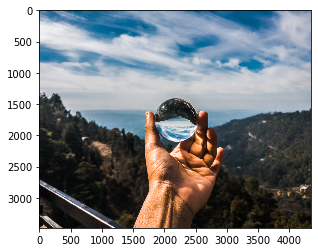

In [282]:
t = "test9"
resultPath = 'C:/Users/pavan/Desktop/Assignments/IP/results/'
img_raw = cv2.imread("./test images/" + t +".jpg")
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img)

pil_img = Image.fromarray(img)
if not os.path.exists(resultPath + t + '/'):
    os.makedirs(resultPath + t + '/')
pil_img.save(resultPath + t + "/0original.jpg")

### Overall Histogram

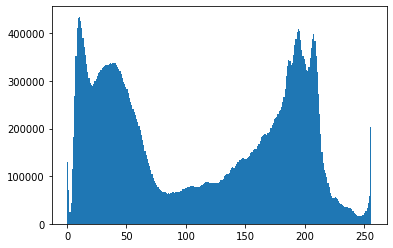

In [283]:
plt.hist(img.ravel(),256,[0,256]) 
plt.savefig(resultPath + t + "/overallHistogram.jpg")
plt.show() 

### Color RGB histogram

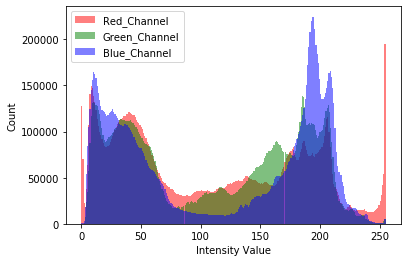

In [284]:
# _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.savefig(resultPath + t + "/RGBHistogram.jpg")
plt.show()

### Crop Image at the Center

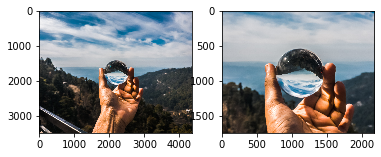

In [285]:
height, width, channels = img.shape   # Get dimensions

preCrop = Image.open(r"./test images/" + t +".jpg") 

width, height = preCrop.size 
  
left = (width - width // 2)/2
top = (height - height // 2)/2
right = (width + width // 2)/2
bottom = (height + height // 2)/2

# Crop the center of the image
centerCroppedImage = preCrop.crop((left, top, right, bottom))

fig, ax = plt.subplots(1,2)

ax[0].imshow(img)
ax[1].imshow(centerCroppedImage)

centerCroppedImage.save(resultPath + t + "/1centerCroppedImage.jpg")

### Gray Image

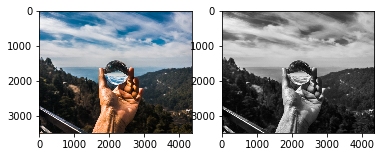

In [286]:
grayImage = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(1,2)

ax[0].imshow(img)
ax[1].imshow(grayImage, cmap = plt.cm.gray)

pil_img = Image.fromarray(grayImage)
pil_img.save(resultPath + t + "/2grayImage.jpg")

### Image Negative

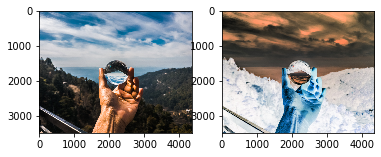

In [287]:
negImage = cv2.bitwise_not(img)

fig, ax = plt.subplots(1,2)

ax[0].imshow(img)
ax[1].imshow(negImage)

pil_img = Image.fromarray(negImage)
pil_img.save(resultPath + t + "/3negImage.jpg")

### Brightening an Image

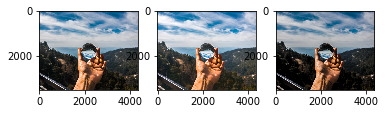

In [288]:
def change_brightness(img, value = 30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    if value < 0:
        lim = 0 - value
        v[v < lim] = 0
        v[v >= lim] -= abs(value)
    else:
        lim = 255 - value
        v[v > lim] = 255
        v[v <= lim] += value 
            
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

brightImage = change_brightness(img, 20)
dullImage = change_brightness(img, -20)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(brightImage)
ax[2].imshow(dullImage)

pil_img = Image.fromarray(brightImage)
pil_img.save(resultPath + t + "/4brightImage.jpg")

pil_img = Image.fromarray(dullImage)
pil_img.save(resultPath + t + "/5dullImage.jpg")

### Image saturation

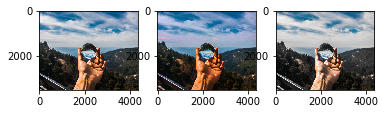

In [289]:
def change_saturation(img, value = 30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    if value < 0:
        lim = 0 - value
        s[s < lim] = 0
        s[s >= lim] -= abs(value)
    else:
        lim = 255 - value
        s[s > lim] = 255
        s[s <= lim] += value 

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

increasedSaturation = change_saturation(img, 40)
decreasedSaturation = change_saturation(img, -40)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(increasedSaturation)
ax[2].imshow(decreasedSaturation)

pil_img = Image.fromarray(increasedSaturation)
pil_img.save(resultPath + t + "/6increasedSaturation.jpg")

pil_img = Image.fromarray(decreasedSaturation)
pil_img.save(resultPath + t + "/7decreasedSaturation.jpg")

### Temparature

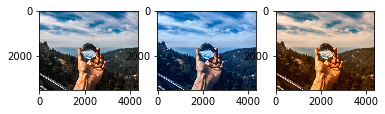

In [290]:
def change_temparature(img, value):
    value = -1 * value
    b, g, r = cv2.split(img)
    
    if value >= 0:
        lim = 255 - value
        r[r > lim] = 255
        r[r <= lim] += value
        
        lim1 = 0 + value
        b[b < lim1] = 0
        b[b >= lim1] -= value
        
    else:
        lim = 0 - value
        r[r < lim] = 0
        r[r >= lim] -= abs(value)
        
        lim = 255 - abs(value)
        b[b > lim] = 255
        b[b <= lim] += abs(value)

    image = cv2.merge((b, g, r))
    return image

coolImage = change_temparature(img, -30)
warmImage = change_temparature(img, 30)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(coolImage)
ax[2].imshow(warmImage)

pil_img = Image.fromarray(coolImage)
pil_img.save(resultPath + t + "/8coolImage.jpg")

pil_img = Image.fromarray(warmImage)
pil_img.save(resultPath + t + "/9warmImage.jpg")

### Tint

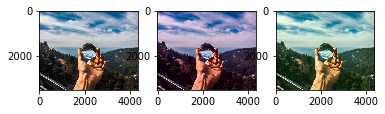

In [291]:
def change_tint(img, value):
    value = -1 * value
    b, g, r = cv2.split(img)
    
    if value >= 0:
        lim = 255 - value
        g[g > lim] = 255
        g[g <= lim] += value
      
    else:
        lim = 0 - value
        g[g < lim] = 0
        g[g >= lim] -= abs(value)

    image = cv2.merge((b, g, r))
    return image

increaseTint = change_tint(img, 20)
decreaseTint = change_tint(img, -20)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(increaseTint)
ax[2].imshow(decreaseTint)

pil_img = Image.fromarray(increaseTint)
pil_img.save(resultPath + t + "/10increaseTint.jpg")

pil_img = Image.fromarray(decreaseTint)
pil_img.save(resultPath + t + "/11decreaseTint.jpg")

### White Balance

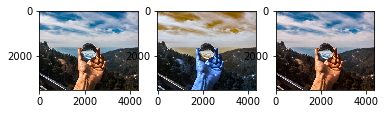

In [292]:
def auto_white_balance(img):
    r, g, b = cv2.split(img)
    r_avg = cv2.mean(r)[0]
    g_avg = cv2.mean(g)[0]
    b_avg = cv2.mean(b)[0]
 
    k = (r_avg + g_avg + b_avg) / 3
    kr = k / r_avg
    kg = k / g_avg
    kb = k / b_avg
 
    r = cv2.addWeighted(src1 = r, alpha = kr, src2 = 0, beta = 0, gamma = 0)
    g = cv2.addWeighted(src1 = g, alpha = kg, src2 = 0, beta = 0, gamma = 0)
    b = cv2.addWeighted(src1 = b, alpha = kb, src2 = 0, beta = 0, gamma = 0)
    
    return cv2.merge([b, g, r])

def manual_white_balance(img, temp, tint):
    image = change_temparature(img, temp)
    image = change_tint(image, tint)
    
    return image
 
autoWhiteBalancedImage = auto_white_balance(img)
manualWhiteBalancedImage = manual_white_balance(img, 5, 5)

fig, ax = plt.subplots(1,3)

ax[0].imshow(img)
ax[1].imshow(autoWhiteBalancedImage)
ax[2].imshow(manualWhiteBalancedImage)

pil_img1 = Image.fromarray(autoWhiteBalancedImage)
pil_img1.save(resultPath + t + "/12autoWhiteBalancedImage.jpg")

pil_img2 = Image.fromarray(manualWhiteBalancedImage)
pil_img2.save(resultPath + t + "/13manualWhiteBalancedImage.jpg")

### Contrast

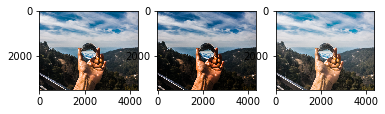

In [293]:
def change_contrast(image, k = 1):
    im = image / 255.0
    return cv2.pow(im, k)

increasedContrast = change_contrast(img, 1.3)
decreasedContrast = change_contrast(img, 0.7)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(increasedContrast)
ax[2].imshow(decreasedContrast)

pil_img1 = Image.fromarray((increasedContrast * 255).astype(np.uint8))
pil_img1.save(resultPath + t + "/14increasedContrast.jpg")

pil_img2 = Image.fromarray((decreasedContrast * 255).astype(np.uint8))
pil_img2.save(resultPath + t + "/15decreasedContrast.jpg")

### Sharpening

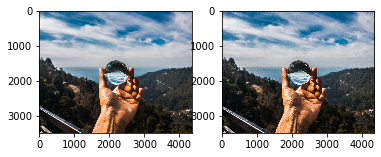

In [294]:
def sharpen(image, k = 5):
    kernel = np.array([[0,-1,0], [-1, k,-1], [0,-1,0]])
    
    return cv2.filter2D(image, -1, kernel)

# second parameter is minimum 9 because of the kernel design
# and the image brightness inherently increases because of the higher second parameter value for higher pixel values
# you can use the change_brightness and change_contrast function to correct the issues

sharpenedImage = sharpen(img, 5)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(img)
ax[1].imshow(sharpenedImage)

pil_img1 = Image.fromarray(sharpenedImage)
pil_img1.save(resultPath + t + "/16sharpenedImage.jpg")

### Smoothening

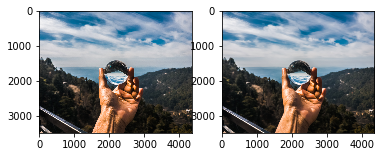

In [295]:
def smoothen(image, k = 5):
    kernel = np.ones((k * 10, k * 10),np.float32) / ((k ** 2) * 100)
    
    return cv2.filter2D(image, -1, kernel)

smoothenedImage = smoothen(img, 1)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(img)
ax[1].imshow(smoothenedImage)

pil_img = Image.fromarray(smoothenedImage)
pil_img.save(resultPath + t + "/17smoothenedImage.jpg")

### Horizontal and Vertical Flip

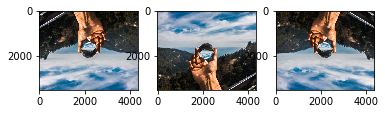

In [296]:
verticalFlip = cv2.flip(img, 0)
horizontalFlip = cv2.flip(img, 1)
doubleFlip = cv2.flip(img, -1)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(verticalFlip)
ax[1].imshow(horizontalFlip)
ax[2].imshow(doubleFlip)

pil_img1 = Image.fromarray(verticalFlip)
pil_img1.save(resultPath + t + "/18verticalFlip.jpg")

pil_img2 = Image.fromarray(horizontalFlip)
pil_img2.save(resultPath + t + "/19horizontalFlip.jpg")

pil_img3 = Image.fromarray(doubleFlip)
pil_img3.save(resultPath + t + "/20doubleFlip.jpg")

### Moody Filter/Edit

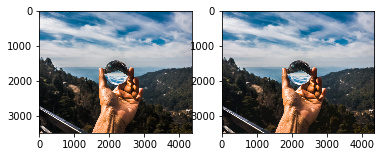

In [297]:
def moody_filter(img, value = 30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = value
    v[v < lim] = lim
    
    final_hsv = cv2.merge((h, s, v))
    image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return image

moodyImage = moody_filter(img, 15)

fig, ax = plt.subplots(1,2)

ax[0].imshow(img)
ax[1].imshow(moodyImage)

pil_img3 = Image.fromarray(moodyImage)
pil_img3.save(resultPath + t + "/21moodyEdit.jpg")

### Blacks and Shadows

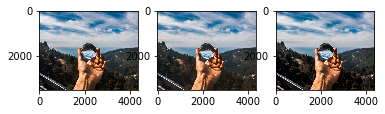

In [298]:
def change_blacks(img, value = 50):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    value = int(value * 0.4)
    
    lim1 = 0
    lim2 = 40
    
    if value < 0:   
        v[v <= abs(value)] = abs(value)
        v[v <= lim2] -= abs(value) 
        if abs(value) > lim2 // 2:
            v[v >= lim2] -= int(0.2 * abs(value))
        
    else:
        v[v <= lim2] += value 
        if value > lim2 // 2:
            v[v <= lim1] += int(0.2 * abs(value))
            v[v >= lim2] += int(0.2 * abs(value))

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

increasedBlacks = change_blacks(img, 30)
decreasedBlacks = change_blacks(img, -30)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(increasedBlacks)
ax[2].imshow(decreasedBlacks)

pil_img1 = Image.fromarray(increasedBlacks)
pil_img1.save(resultPath + t + "/22increasedBlacks.jpg")

pil_img2 = Image.fromarray(decreasedBlacks)
pil_img2.save(resultPath + t + "/23decreasedBlacks.jpg")

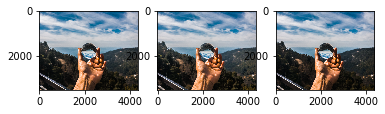

In [299]:
def change_shadows(img, value = 50):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    value = int(value * 0.4)
    
    lim1 = 40
    lim2 = 120
    
    if value < 0:   
        v[v <= lim1] += abs(value)
        v[v <= lim2] -= abs(value)
        if abs(value) > lim1 // 2:
            v[v >= lim2] -= int(0.2 * abs(value))
            v[v <= int(0.2 * abs(value))] = int(0.2 * abs(value))
            v[v <= lim1] -= int(0.2 * abs(value))
        
    else:
        v[v <= lim2] += value
        v[v <= lim1] -= value 
        if value > lim1 // 2:
            v[v <= lim1] += int(0.2 * value)
            v[v >= lim2] += int(0.2 * value)

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

increasedShadows = change_shadows(img, 30)
decreasedShadows = change_shadows(img, -30)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(increasedShadows)
ax[2].imshow(decreasedShadows)

pil_img1 = Image.fromarray(increasedShadows)
pil_img1.save(resultPath + t + "/24increasedShadows.jpg")

pil_img2 = Image.fromarray(decreasedShadows)
pil_img2.save(resultPath + t + "/25decreasedShadows.jpg")

### Whites and Highlights

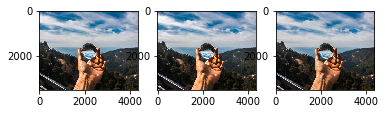

In [300]:
def change_whites(img, value = 50):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    value = int(value * 0.4)
    
    lim1 = 215
    lim2 = 255
    
    if value < 0:   
        v[v >= lim1] -= abs(value)
        if abs(value) > int((lim2 - lim1) // 2):
            v[v < int(0.2 * abs(value))] = int(0.2 * abs(value))
            v[v <= lim1] -= int(0.2 * abs(value))
        
    else:
        v[v >= lim2 - value] = lim2 - value
        v[v >= lim1] += value 
        if value >= int((lim2 - lim1) // 2):
            v[v <= lim1] += int(0.2 * value)

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

increasedWhites = change_whites(img, 30)
decreasedWhites = change_whites(img, -30)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(increasedWhites)
ax[2].imshow(decreasedWhites)

pil_img1 = Image.fromarray(increasedWhites)
pil_img1.save(resultPath + t + "/26increasedWhites.jpg")

pil_img2 = Image.fromarray(decreasedWhites)
pil_img2.save(resultPath + t + "/27decreasedWhites.jpg")

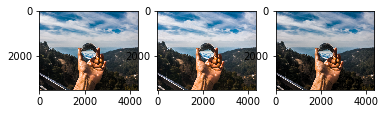

In [301]:
def change_highlights(img, value = 50):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    value = int(value * 0.4)
    
    lim1 = 135
    lim2 = 215
    
    if value < 0:   
        v[v <= lim1] += abs(value)
        v[v <= lim2] -= abs(value)
        if abs(value) > (lim2 - lim1) // 8:
            v[v >= lim2] -= int(0.7 * abs(value))
            v[v <= int(0.7 * abs(value))] = int(0.5 * abs(value))
            v[v <= lim1] -= int(0.5 * abs(value))
        
    else:
        v[v <= lim2] += value
        v[v <= lim1] -= value 
        if value > (lim2 - lim1) // 8:
            v[v <= lim1] += int(0.5 * value)
            v[v >= 255 - int(0.5 * value)] = 255 - int(0.5 * value)
            v[v >= lim2] += int(0.5 * value)

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

increasedHighlights = change_highlights(img, 30)
decreasedHighlights = change_highlights(img, -30)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(increasedHighlights)
ax[2].imshow(decreasedHighlights)

pil_img1 = Image.fromarray(increasedHighlights)
pil_img1.save(resultPath + t + "/28increasedHighlights.jpg")

pil_img2 = Image.fromarray(decreasedHighlights)
pil_img2.save(resultPath + t + "/29decreasedHighlights.jpg")

### Image Editing - Creating and using Presets

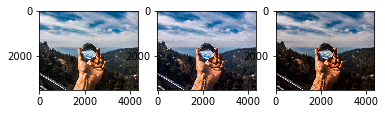

In [302]:
def preset1(image):
    editedImg = change_brightness(image, 10)
    editedImg = change_highlights(editedImg, -30)
    editedImg = change_blacks(editedImg, -10)
    editedImg = manual_white_balance(editedImg, -5, 5)
    editedImg = sharpen(editedImg, 5)
    return editedImg

def preset2(image):
    editedImg = change_highlights(image, -30)
    editedImg = manual_white_balance(editedImg, 5, 2)
    editedImg = (change_contrast(editedImg, 1.2) * 255).astype(np.uint8)
    editedImg = sharpen(editedImg, 5)
    editedImg = change_shadows(editedImg, 5)
    return editedImg

editedImgP1 = preset1(img)
editedImgP2 = preset2(img)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(img)
ax[1].imshow(editedImgP1)
ax[2].imshow(editedImgP2)

pil_img1 = Image.fromarray(editedImgP1)
pil_img1.save(resultPath + t + "/30editedPreset1.jpg")

pil_img2 = Image.fromarray(editedImgP2)
pil_img2.save(resultPath + t + "/31editedPreset2.jpg")

## Extras

### Two images Blending / Double Exposure

True

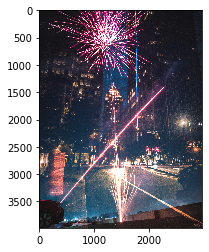

In [55]:
img1 = cv2.imread("./test images/test3.jpg")

img2 = cv2.imread("./test images/test4.jpg")

doubleExposure = cv2.addWeighted(img1, 1 , img2, 1, 0) 

plt.imshow(cv2.cvtColor(doubleExposure, cv2.COLOR_BGR2RGB))
cv2.imwrite('./results/doubleExposure.jpg', doubleExposure)

### Long Exposure from TimeLapse

In [85]:
class LongExposure:
    def __init__(self, video, output_path, step=1):
        self.video = video
        self.output_path = output_path
        self.step = step
    
    @staticmethod
    def averager():
        count = 0
        total = 0.0

        def average(value):
            nonlocal count, total
            count += 1
            total += value
            
            return total / count

        return average

    def __call__(self):
        stream = cv2.VideoCapture(self.video)
        total_frames = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))

        r, g, b = None, None, None
        r_avg, g_avg, b_avg = self.averager(), self.averager(), self.averager()

        for count in tqdm(range(total_frames)):
            _, frame = stream.read()

            if count % self.step == 0 and frame is not None:
                b_curr, g_curr, r_curr = cv2.split(frame.astype("float"))
                r, g, b = r_avg(r_curr), g_avg(g_curr), b_avg(b_curr)

        avg = cv2.merge([b, g, r]).astype("uint8")
        cv2.imwrite(self.output_path, avg)

        stream.release()
        
video = "./test videos/video2.mp4"
output_path = resultPath + "LE1.jpg"

longExp = LongExposure(video, output_path, 10)
longExp.__call__()


100%|████████████████████████████████████████████████████████████████████████████████| 452/452 [01:13<00:00,  6.12it/s]


### Exposure Bracketing

True

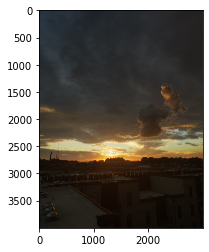

In [86]:
def exposureBracketing(folder):
    files = glob.glob (folder)

    image_data = []

    for file in files:
        this_image = cv2.imread(file, 1)
        image_data.append(this_image)
    
    dst = image_data[0]

    for i in range(len(image_data)):
        if i == 0:
            pass
        else:
            alpha = 1.0 / (i + 1)
            beta = 1.0 - alpha
            dst = cv2.addWeighted(image_data[i], alpha, dst, beta, 0.0)
        
    return dst
        
exposureBracket = exposureBracketing("./test images/Exposure Bracketing1/*.jpg")
plt.imshow(cv2.cvtColor(exposureBracket, cv2.COLOR_BGR2RGB))
cv2.imwrite('./results/expBrg1.jpg', exposureBracket)